To use PCA Algorithm for dimensionality reduction. You have a dataset that
includes measurements for different variables on wine (alcohol, ash,
magnesium, and so on). Apply PCA algorithm & transform this data so that
most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red
and white wine by inspecting these principal components

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_wine
data = pd.concat([pd.DataFrame(load_wine().data,columns = load_wine().feature_names),pd.DataFrame(load_wine().target,columns = ['target'])],axis=1)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
load_wine().target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
data.shape

(178, 14)

In [8]:
data['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [44]:
X,y = data.drop(columns = ['target']),data['target']

In [45]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [47]:
X = pd.concat([pd.DataFrame(pca.fit_transform(X_scaled),columns = ['col1','col2']),pd.DataFrame(data['target'])],axis = 1)
X

,col1,col2,target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0
...,...,...,...
173,-3.370524,2.216289,2
174,-2.601956,1.757229,2
175,-2.677839,2.760899,2
176,-2.387017,2.297347,2


<Axes: xlabel='col1', ylabel='col2'>

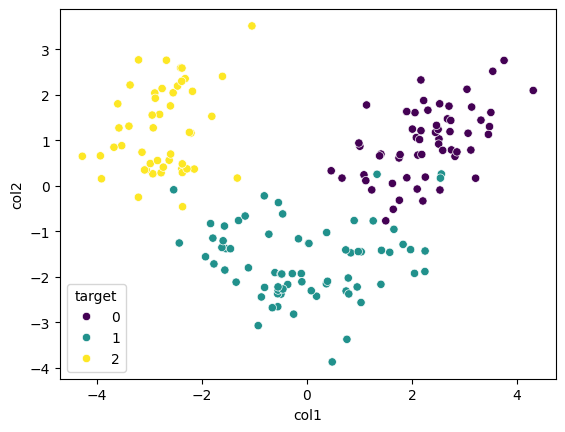

In [48]:
sns.scatterplot(data = X, x = 'col1',y='col2' , hue = 'target',palette = 'viridis')